# Testing recommendations for binary classification with an imbalanced target variable

Training classification models with imbalance in the target variable can be difficult since the model will often favour the majority class (predicting only the majority class produces a model with very high accuracy). Underrepresentation of the minority class is common when predicting rare events like this recessions, rare diseases, and natural disasters and it makes prediction difficult since there is often a very high cost to false positives/negatives.

The [African country recession dataset](https://www.kaggle.com/chirin/african-country-recession-dataset-2000-to-2017?select=africa_recession.csv) is a record of 27 African countries from 2000 to 2017 with data on 49 economic indicators and a target variable "growthbucket" that represents whether the country experienced a recession or not. The target variable is highly imbalanced, with over 90% of records in the majority "No_Recession" class. This makes it an ideal dataset for comparing recommendations for binary classification on extremely imbalanced data.

There are several recommendations for dealing with imbalance in the target variable, so a few were selected for this exercise, namely:


1.   Using a decision tree based algorithm
2.   Applying ensemble methods
3.   Undersampling of the majority class
4.   Oversampling of the minority class (resampling and SMOTE)




## Data Exploration

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading data
data = pd.read_csv("africa_recession.csv")
data.head()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,426543.343800,0.009374,0.648979,0.626111,95642.992190,131823.703100,7.039534e+05,0.512764,1.068518,1.008857,0.483403,0.119199,0.043679,10.625636,0.307452,0.309123,0.295914,0.618509,0.250884,0.134649,0.121411,-0.182028,0.056574,0.289768,0.314139,0.388684,0.465633,0.481975,0.278865,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,804602.250000,0.019658,0.719390,0.657543,308969.156300,379569.906300,1.669636e+06,0.647240,0.973863,0.865942,0.561062,0.108611,0.042740,6.939828,0.348586,0.354220,0.351310,0.670727,0.147136,0.133380,0.135068,-0.130606,0.044295,0.323617,0.385008,0.474147,0.494095,0.520165,0.444091,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,67072.593750,0.001670,0.308652,0.292607,36392.964840,43032.312500,1.616443e+05,0.399972,0.985717,0.816634,0.506038,0.188336,0.045847,800.408508,0.358321,0.357803,0.351029,0.672994,0.183977,0.129643,0.035281,-0.087737,0.065842,0.368704,0.355546,0.304422,0.501278,0.487623,0.350502,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5790.396973,0.000184,0.205865,0.234643,7096.825195,7673.087891,1.014219e+04,0.450355,0.703341,0.730731,0.741010,0.080584,0.048116,389.696228,0.281181,0.293343,0.293662,0.869283,0.087738,0.229176,0.024138,-0.017928,-0.192408,0.292345,0.445609,0.238837,0.470837,0.511137,0.402848,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,16907.236330,0.000431,0.959765,0.993985,5540.332520,7002.934570,4.100362e+04,1.068165,0.737721,0.752696,0.612079,0.033991,0.057299,6.939828,0.206353,0.235375,0.222508,0.845482,0.102297,0.130042,0.234137,-0.291400,-0.020558,0.200053,0.512144,0.247313,0.487032,0.482645,0.398468,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0


In [ ]:
# Data details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pop                     486 non-null    float64
 1   emp                     486 non-null    float64
 2   emp_to_pop_ratio        486 non-null    float64
 3   hc                      486 non-null    float64
 4   ccon                    486 non-null    float64
 5   cda                     486 non-null    float64
 6   cn                      486 non-null    float64
 7   ck                      486 non-null    float64
 8   ctfp                    486 non-null    float64
 9   cwtfp                   486 non-null    float64
 10  rconna                  486 non-null    float64
 11  rdana                   486 non-null    float64
 12  rnna                    486 non-null    float64
 13  rkna                    486 non-null    float64
 14  rtfpna                  486 non-null    fl

The dataset has 49 numeric (float) variables and one target variable (growthbucket) which has a 0 or 1 value. The data appears to have 486 records with no null values.

In [ ]:
# Dataset description
data.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.00000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,20.185755,7.121089,0.357865,1.777389,64361.006942,80885.988722,2.442244e+05,0.004583,0.454419,0.453431,68169.779343,86894.648830,2.960933e+05,0.922019,0.988884,0.956187,0.513159,0.115962,0.048087,447.069460,0.420510,0.425005,0.411562,0.679354,0.206769,0.174061,0.168543,-0.225677,-0.003049,0.430719,0.474535,0.407058,0.623058,0.592560,0.394489,480.433333,315.391667,1205.33000,512.912222,322.411667,221.326667,1009.445556,0.044535,0.030346,0.082411,0.058144,0.024774,0.033930,0.023741,0.078189
std,30.037490,9.921471,0.080541,0.446339,129634.856793,156740.416624,4.725163e+05,0.008210,0.206562,0.203056,136352.268853,164892.302342,5.126251e+05,0.340277,0.143482,0.140860,0.148923,0.073690,0.012163,797.259327,0.126245,0.117072,0.117266,0.158903,0.088993,0.063082,0.142386,0.132546,0.090130,0.136076,0.142659,0.160308,0.104425,0.076358,0.386874,132.323682,65.322380,416.62894,173.040876,44.315222,49.803981,140.125951,0.184025,0.105616,0.288454,0.151285,0.129924,0.127101,0.076937,0.268746
min,1.061468,0.243000,0.198212,1.069451,2781.259277,2984.366943,5.790397e+03,0.000124,0.098622,0.107790,2786.592285,2978.288574,8.735905e+03,0.136824,0.429515,0.382910,0.164316,0.010000,0.024867,1.000000,0.150231,0.146762,0.128689,0.223663,0.049954,0.016554,0.012206,-0.784460,-0.652756,0.154627,0.030470,0.044227,0.375171,0.432636,0.062744,274.690000,205.270000,586.13000,241.900000,245.560000,149.370000,843.660000,-0.359446,-0.173741,-0.477017,-0.157564,-0.174550,-0.225998,-0.113858,0.000000
25%,3.830730,1.048750,0.297922,1.445886,9117.209716,11081.697755,2.429231e+04,0.000514,0.301179,0.295615,8797.567871,10660.792725,3.465814e+04,0.709967,0.946962,0.900594,0.426136,0.063373,0.041254,8.609180,0.338547,0.349186,0.329368,0.594391,0.142124,0.132076,0.059928,-0.299666,-0.034658,0.346740,0.383279,0.299052,0.536308,0.541171,0.294728,355.210000,271.740000,801.96000,331.440000,289.580000,185.770000,899.190000,-0.058931,-0.044322,-0.102940,-0.053405,-0.060792,-0.026451,-0.020995,0.000000
50%,10.868272,4.184000,0.368841,1.689902,17471.495120,22228.022460,6.432356e+04,0.001355,0.400647,0.405870,16610.300780,21656.230470,7.413105e+04,0.933401,1.000000,0.978814,0.523287,0.107553,0.046315,152.079811,0.409295,0.422608,0.408461,0.708287,0.193263,0.168642,0.136851,-0.186369,0.000000,0.416230,0.471758,0.383152,0.640564,0.607994,0.357652,485.785000,326.945000,1285.16500,562.320000,328.020000,213.095000,948.745000,0.061860,0.019950,0.054933,0.046808,0.003277,0.038444,0.006529,0.000000
75%,24.220695,8.517560,0.416717,2.117452,58016.873047,69676.791020,1.886244e+05,0.003227,0.616736,0.603459,61146.049805,81660.662112,2.488039e+05,1.037367,1.038464,1.015393,0.612079,0.161361,0.052742,550.521500,0.490157,0.489201,0.487113,0.792734,0.268336,0.208797,0.221857,-0.126700,0.041204,0.495139,0.558896,0.497188,0.715812,0.645224,0.433157,611.580000,363.530000,1555.86000,642.820000,348.510000,265.400000,1095.320000,0.208732,0.105791,0.245094,0.154531,0.096810,0.112793,0.047421,0.000000
max,190.886307,65.156548,0.555433,2.885300,758455.187500,896604.8

The dataset has multiple numeric variables measured on varying scales. However, using a decision tree-based method eliminates the need for feature scaling.

In [ ]:
# Checking for null values
data.isna().any()

pop                       False
emp                       False
emp_to_pop_ratio          False
hc                        False
ccon                      False
cda                       False
cn                        False
ck                        False
ctfp                      False
cwtfp                     False
rconna                    False
rdana                     False
rnna                      False
rkna                      False
rtfpna                    False
rwtfpna                   False
labsh                     False
irr                       False
delta                     False
xr                        False
pl_con                    False
pl_da                     False
pl_gdpo                   False
csh_c                     False
csh_i                     False
csh_g                     False
csh_x                     False
csh_m                     False
csh_r                     False
pl_c                      False
pl_i                      False
pl_g    

The data has no null values, as expected.

In [ ]:
# Checking for duplicates
data.duplicated().any()

False

There are no duplicated records in this dataset.

In [ ]:
# Counting number of records from each class
from collections import Counter
counter = Counter(data.growthbucket)
counter

Counter({0: 448, 1: 38})

448 out of 486 records belong to the majority (no recession) class. This leaves less than 8% of records in the minority (recession) class.

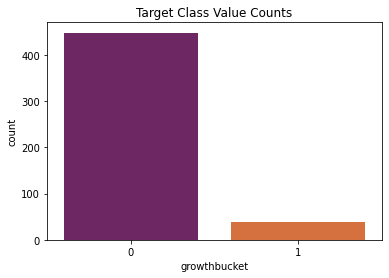

In [ ]:
# Plotting count by class (label)
plt.figure()
sns.countplot(data.growthbucket, palette = 'inferno')
plt.title('Target Class Value Counts')
plt.savefig('countplot.png', bbox_inches = "tight")

The plot confirms an extreme imbalance in the target variable.

## Testing recommendations for prediction

### 1. Decision tree algorithm

Decision trees typically work well on imbalanced data, and therefore a simple decision tree classifier can be used as an initial/baseline model for prediction.

In [ ]:
# Creating separate subsets of the data for labels and the rest of the variables
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

# Splitting them into test and train datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Decision tree model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

# Fitting and making predictions
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# Accuracy score
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_dtc)

0.9387755102040817

An accuracy score of 94% can be great, but it is important to be critical of this score when dealing with imbalance. Other metrics that show the strength of prediction for both the majority and minority class can provide a better picture of model performance (the ratios of true/false positives/negatives).


 ROC AUC: 0.6838709677419355

 classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        93
           1       0.40      0.40      0.40         5

    accuracy                           0.94        98
   macro avg       0.68      0.68      0.68        98
weighted avg       0.94      0.94      0.94        98


 confusion matrix: 



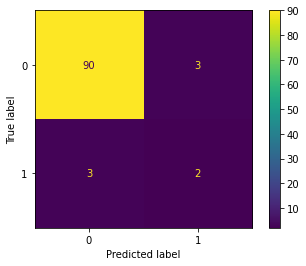

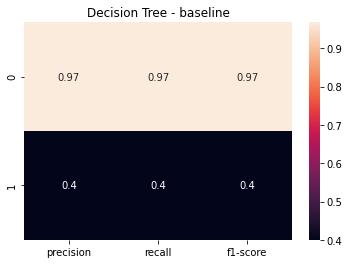

In [ ]:
# Trying different metrics
print("\n AUC-ROC:", metrics.roc_auc_score(y_test, y_pred_dtc)) #AUC-ROC
print("\n classification report: \n", metrics.classification_report(y_test, y_pred_dtc)) # Classification report
print("\n confusion matrix: \n", metrics.plot_confusion_matrix(dtc, X_test, y_test)) # Confusion matrix
print()

# Classification report
from sklearn.metrics import classification_report
clf_report_dtc = classification_report(y_test, y_pred_dtc, output_dict=True)
plt.figure()
plt.title("Decision Tree - baseline")
sns.heatmap(pd.DataFrame(clf_report_dtc).iloc[:-1, :-3].T, annot=True)
plt.show()

The model performs very well when predicting the majority class, but has trouble making accurate predictions for the minority class. There is a high rate of both false positives and negatives.


### 2. Ensemble methods

Ensemble methods combine several weak learners (single decision trees) to create a strong learner. [Bagging and boosting](https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9#:~:text=Ensemble%20methods%2C%20which%20combines%20several,to%20form%20a%20strong%20learner.) are common methods for reducing variance/overfitting or error, respectively.

Decision Tree
confusion matrix: 
 [[90  3]
 [ 3  2]]


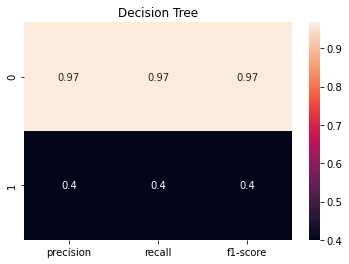


Random Forest
confusion matrix: 
 [[92  1]
 [ 4  1]]


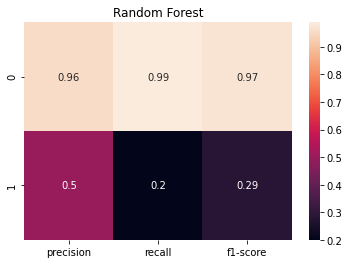


Gradient Boosting
confusion matrix: 
 [[92  1]
 [ 4  1]]


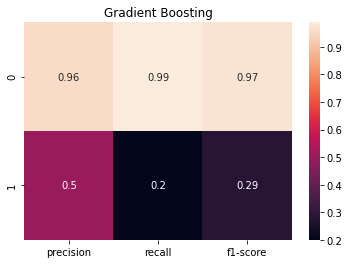


XGBoost
confusion matrix: 
 [[93  0]
 [ 4  1]]


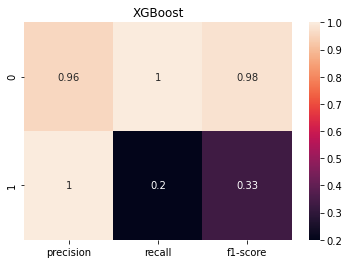

In [ ]:
# Comparing models based on decision trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Defining models
models = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0), GradientBoostingClassifier(random_state=0), XGBClassifier(random_state=0)]
names = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]
results_dt = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0) # 10-fold random stratified cross-validation
acc = []
auc = []

# Getting scores for the different models
for model, name in zip(models, names):
  model = model.fit(X_train, y_train)
  pred = model.predict(X_test)
  
  cv_results = cross_val_score(model, X, y, cv=cv, scoring="roc_auc") # Storing AUC-ROC scores for plot
  results_dt.append(cv_results)

  acc.append(cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()) # Storing accuracy values
  auc.append(cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1).mean()) # Storing AUC-ROC scores

  print(name)
  print("confusion matrix: \n", metrics.confusion_matrix(y_test, pred)) # Confusion matrix
  
  
  #Plotting classification report
  clf_report = classification_report(y_test, pred, output_dict=True)
  plt.figure()
  plt.title(name)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True)
  plt.show()

  print()     

In [ ]:
# Accuracy and AUC-ROC Scores
scores = pd.DataFrame(list(zip(names, acc, auc)), columns =["Algorithm", "Accuracy Score", "AUC-ROC Score"]) 
scores.to_csv("scores.csv")
scores

,Algorithm,Accuracy Score,AUC-ROC Score
0,Decision Tree,0.882143,0.632348
1,Random Forest,0.918467,0.798859
2,Gradient Boosting,0.910899,0.701242
3,XGBoost,0.925950,0.789555


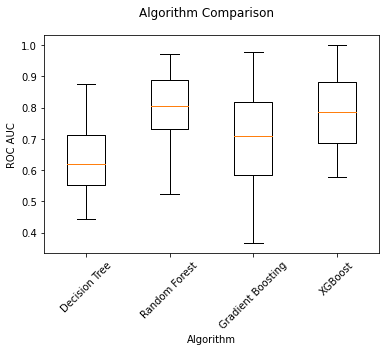

In [ ]:
# Plotting AUC-ROC
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_dt)
plt.xlabel('Algorithm')
plt.ylabel('AUC-ROC')
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()

The accuracy and AUC-ROC scores improved, but prediction accuracy is still poor for the minority class.

### 3. Cost-sensitive classification

Adding sample weights to the algorithm's parameters to ensure that sampling is conducted evenly across the classes is another way to offset the imbalance.

In [ ]:
# Calculating sample weight for XGBoost
from math import sqrt
scale_pos_weight_sqrt = sqrt(len(data[data['growthbucket'] == 0])/len(data[data['growthbucket'] == 1]))

Decision Tree (Balanced)
confusion matrix: 
 [[88  5]
 [ 5  0]]


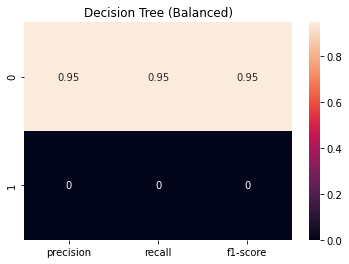


Random Forest (Balanced)
confusion matrix: 
 [[93  0]
 [ 4  1]]


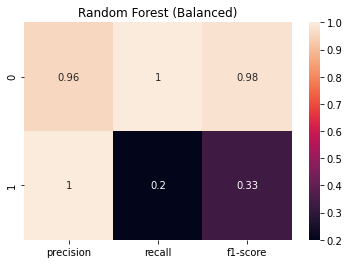


XGBoost (Balanced)
confusion matrix: 
 [[93  0]
 [ 4  1]]


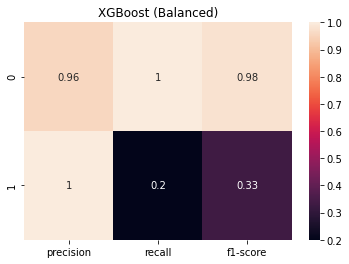

In [ ]:
# Weighted/cost-sensitive decision trees
models_balanced = [DecisionTreeClassifier(random_state=0, class_weight = "balanced"), RandomForestClassifier(random_state=0, class_weight="balanced_subsample"), XGBClassifier(random_state=0, scale_pos_weight = scale_pos_weight_sqrt)]
names_balanced = ["Decision Tree (Balanced)", "Random Forest (Balanced)", "XGBoost (Balanced)"]
results_balanced = []
acc_balanced = []
auc_balanced = []

# Getting scores for the different models
for model, name in zip(models_balanced, names_balanced):
  model = model.fit(X_train, y_train)
  pred = model.predict(X_test)

  cv_results = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")
  results_balanced.append(cv_results)

  acc_balanced.append(cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()) # Storing accuracy values
  auc_balanced.append(cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1).mean()) # Storing AUC-ROC scores

  print(name)
  print("confusion matrix: \n", metrics.confusion_matrix(y_test, pred))

  #Plotting classification report
  clf_report = classification_report(y_test, pred, output_dict=True)
  plt.figure()
  plt.title(name)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True)
  plt.show()

  print()     

In [ ]:
# Accuracy and AUC-ROC Scores
scores_balanced = pd.DataFrame(list(zip(names, acc_balanced, auc_balanced)), columns =["Algorithm", "Accuracy Score", "AUC-ROC Score"]) 
scores_balanced.to_csv("scores balanced.csv")
scores_balanced

,Algorithm,Accuracy Score,AUC-ROC Score
0,Decision Tree,0.887599,0.579419
1,Random Forest,0.931448,0.791689
2,Gradient Boosting,0.917063,0.791505


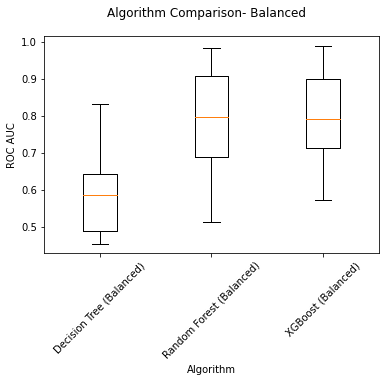

In [ ]:
# Plotting AUC-ROC
fig = plt.figure()
fig.suptitle("Algorithm Comparison- Balanced")
ax = fig.add_subplot(111)
plt.boxplot(results_balanced)
plt.xlabel('Algorithm')
plt.ylabel('AUC-ROC')
ax.set_xticklabels(names_balanced)
plt.xticks(rotation=45)
plt.show()

Using cost-sensitive algorithms improved precision with ensemble methods but did not improve other scores.

### 4. Random undersampling

Down-sampling the majority class by randomly selecting records from the majority class without replacement to match the number of records in the minority class can produce a more balanced subset of the data.

In [ ]:
# Undersampling
from sklearn.utils import resample
majority = data[data.growthbucket==0] # Majority class
minority = data[data.growthbucket==1] # Minority class
 
majority_undersampled = resample(majority, replace=False, n_samples=38, random_state=0) # Randomly selects 38 records from majority to match minority class size

df_undersampled = pd.concat([majority_undersampled, minority])  # Minority class + sample of 38 from majority
 
df_undersampled.growthbucket.value_counts()

1    38
0    38
Name: growthbucket, dtype: int64

Decision Tree
confusion matrix: 
 [[4 2]
 [5 5]]


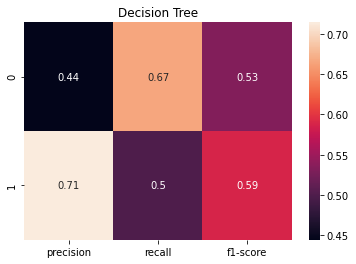


Random Forest
confusion matrix: 
 [[4 2]
 [4 6]]


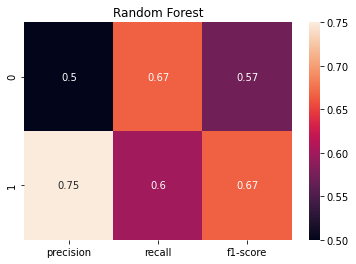


Gradient Boosting
confusion matrix: 
 [[3 3]
 [4 6]]


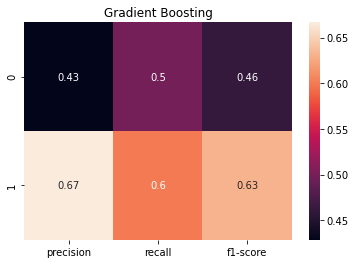


XGBoost
confusion matrix: 
 [[3 3]
 [3 7]]


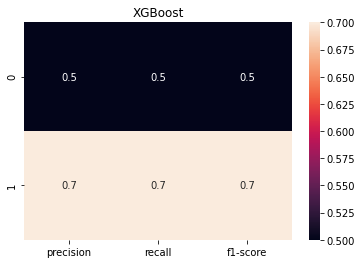

In [ ]:
# Comparing models on undersampled data

# Preparing data
X_under = df_undersampled.iloc[:, 0:-1].values
y_under = df_undersampled.iloc[:, -1].values

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0)

results_under = []
acc_under = []
auc_under = []

# Getting scores for the different models
for model, name in zip(models, names):
  model = model.fit(X_train_under, y_train_under)
  pred = model.predict(X_test_under)

  cv_results = cross_val_score(model, X_under, y_under, cv=cv, scoring="roc_auc")
  results_under.append(cv_results)

  acc_under.append(cross_val_score(model, X_under, y_under, scoring="accuracy", cv=cv, n_jobs=-1).mean()) # Storing accuracy values
  auc_under.append(cross_val_score(model, X_under, y_under, scoring="roc_auc", cv=cv, n_jobs=-1).mean()) # Storing roc_auc scores

  print(name)
  print("confusion matrix: \n", metrics.confusion_matrix(y_test_under, pred))

  #Plotting classification report
  clf_report = classification_report(y_test_under, pred, output_dict=True)
  plt.figure()
  plt.title(name)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True)
  plt.show()

  print()     

In [ ]:
# Accuracy and AUC-ROC Scores
scores_under = pd.DataFrame(list(zip(names, acc_under, auc_under)), columns =["Algorithm", "Accuracy Score", "AUC-ROC Score"]) 
scores_under.to_csv("scores under.csv")
scores_under

,Algorithm,Accuracy Score,AUC-ROC Score
0,Decision Tree,0.594048,0.601389
1,Random Forest,0.674405,0.771181
2,Gradient Boosting,0.657738,0.703472
3,XGBoost,0.663690,0.715278


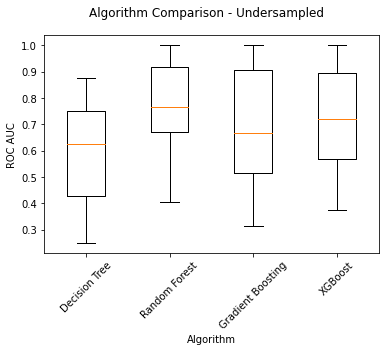

In [ ]:
# Plotting AUC-ROC
fig = plt.figure()
fig.suptitle("Algorithm Comparison - Undersampled")
ax = fig.add_subplot(111)
plt.boxplot(results_under)
plt.xlabel('Algorithm')
plt.ylabel('AUC-ROC')
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()

Scores are generally lower with undersampling, which was expected with the extreme imbalance and smaller dataset. However, the accuracy of predictions is more even between the classes.

### 5. Oversampling

Adding records to the minority class can help the model to predict the minority class more. 

**Random Oversampling**

Random oversampling selects random records to duplicate from the minority class (with replacement) until the number of records from each class is even.

In [ ]:
# Random oversampling
minority_oversampled = resample(minority, replace=True, n_samples=448, random_state=0) 
 
df_oversampled = pd.concat([minority_oversampled, majority])
 
df_oversampled.growthbucket.value_counts()

1    448
0    448
Name: growthbucket, dtype: int64

Decision Tree
confusion matrix: 
 [[89  5]
 [ 0 86]]


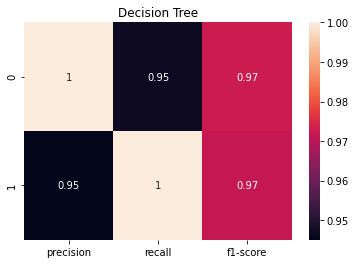


Random Forest
confusion matrix: 
 [[91  3]
 [ 0 86]]


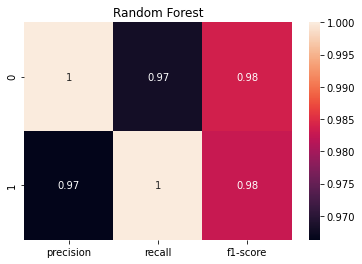


Gradient Boosting
confusion matrix: 
 [[87  7]
 [ 0 86]]


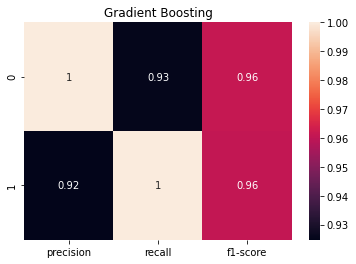


XGBoost
confusion matrix: 
 [[88  6]
 [ 0 86]]


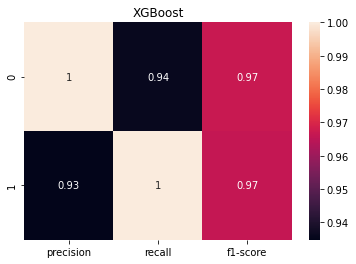

In [ ]:
# Oversampling (resample)

# Preparing data
X_over = df_oversampled.iloc[:, 0:-1].values
y_over = df_oversampled.iloc[:, -1].values

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

results_over = []
acc_over = []
auc_over = []

# Getting scores for the different models
for model, name in zip(models, names):
  model = model.fit(X_train_over, y_train_over)
  pred = model.predict(X_test_over)

  cv_results = cross_val_score(model, X_over, y_over, cv=cv, scoring="roc_auc")
  results_over.append(cv_results)

  acc_over.append(cross_val_score(model, X_over, y_over, scoring="accuracy", cv=cv, n_jobs=-1).mean()) # Storing accuracy values
  auc_over.append(cross_val_score(model, X_over, y_over, scoring="roc_auc", cv=cv, n_jobs=-1).mean()) # Storing AUC-ROC scores

  print(name)
  print("confusion matrix: \n", metrics.confusion_matrix(y_test_over, pred))

  #Plotting classification report
  clf_report = classification_report(y_test_over, pred, output_dict=True)
  plt.figure()
  plt.title(name)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True)
  plt.show()

  print()     

In [ ]:
# Accuracy and AUC-ROC Scores
scores_over = pd.DataFrame(list(zip(names, acc_over, auc_over)), columns =["Algorithm", "Accuracy Score", "AUC-ROC Score"]) 
scores_over.to_csv("scores over.csv")
scores_over

,Algorithm,Accuracy Score,AUC-ROC Score
0,Decision Tree,0.966122,0.966103
1,Random Forest,0.983596,1.000000
2,Gradient Boosting,0.974303,0.999092
3,XGBoost,0.974295,0.998830


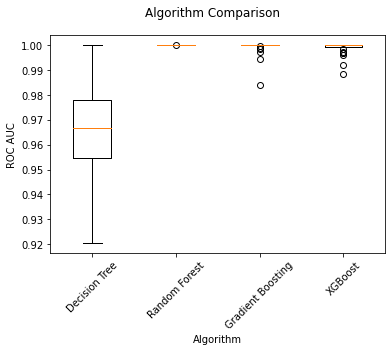

In [ ]:
# Plotting AUC-ROC
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_over)
plt.xlabel('Algorithm')
plt.ylabel('AUC-ROC')
ax.set_xticklabels(names)
plt.xticks(rotation=45)

plt.show()

Random oversampling improves the accuracy of predictions for both classes. The ensemble methods show much greater improvement with this method.

**SMOTE**

Synthetic Minority Oversampling Technique (SMOTE) uses the K-nearest neighbours algorithm to create plausible new synthetic records between actual records in the minority class. This is an improvement to the random duplication method that prevents overfitting.

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
Counter_SMOTE = Counter(y_smote)
Counter_SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 448, 1: 448})

Decision Tree
confusion matrix: 
 [[80  5]
 [ 5 90]]


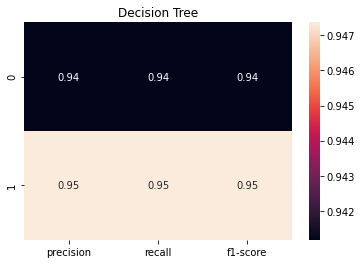


Random Forest
confusion matrix: 
 [[82  3]
 [ 4 91]]


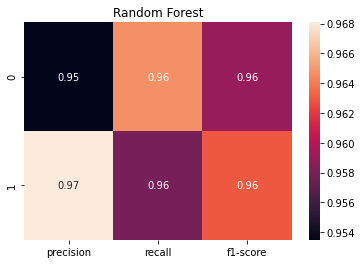


Gradient Boosting
confusion matrix: 
 [[84  1]
 [ 4 91]]


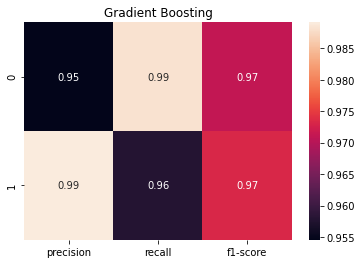


XGBoost
confusion matrix: 
 [[82  3]
 [ 5 90]]


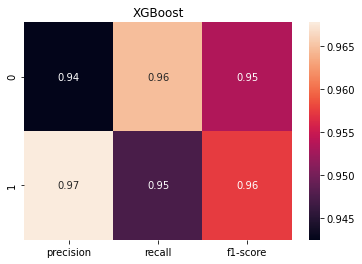

In [ ]:
# Oversampling - SMOTE

#Preparing data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

results_smote = []
acc_smote = []
auc_smote = []

# Getting scores for the different models
for model, name in zip(models, names):
  model = model.fit(X_train_smote, y_train_smote)
  pred = model.predict(X_test_smote)
  
  cv_results = cross_val_score(model, X_smote, y_smote, cv=cv, scoring="roc_auc")
  results_smote.append(cv_results)

  acc_smote.append(cross_val_score(model, X_smote, y_smote, scoring="accuracy", cv=cv, n_jobs=-1).mean()) # Storing accuracy values
  auc_smote.append(cross_val_score(model, X_smote, y_smote, scoring="roc_auc", cv=cv, n_jobs=-1).mean()) # Storing AUC-ROC scores

  print(name)
  print("confusion matrix: \n", metrics.confusion_matrix(y_test_smote, pred))
  
  #Plotting classification report
  clf_report = classification_report(y_test_smote, pred, output_dict=True)
  plt.figure()
  plt.title(name)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True)
  plt.show()


  print()     

In [ ]:
# Accuracy and AUC-ROC Scores
scores_smote = pd.DataFrame(list(zip(names, acc_smote, auc_smote)), columns =["Algorithm", "Accuracy Score", "AUC-ROC Score"]) 
scores_smote.to_csv("scores smote.csv")
scores_smote

,Algorithm,Accuracy Score,AUC-ROC Score
0,Decision Tree,0.931927,0.931860
1,Random Forest,0.964673,0.996153
2,Gradient Boosting,0.955739,0.992003
3,XGBoost,0.960191,0.992600


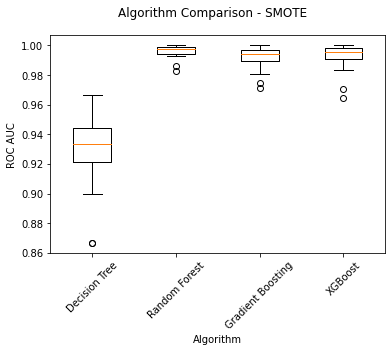

In [ ]:
# Plotting AUC-ROC
fig = plt.figure()
fig.suptitle('Algorithm Comparison - SMOTE')
ax = fig.add_subplot(111)
plt.boxplot(results_smote)
plt.xlabel('Algorithm')
plt.ylabel('AUC-ROC')
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()

The accuracy of prediction is high using SMOTE, especially with ensemble methods.

## Evaluation and Conclusion

Oversampling with ensemble decision tree-based methods gives the best result for this dataset - a smaller dataset with extreme imbalance in the target variable.

**Future work**

The overall best model for this classification can be improved with parameter tuning and used for future predictions.